In [393]:
import pandas as pd
import numpy as np
from sksurv.nonparametric import kaplan_meier_estimator
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [8]:
from sksurv.datasets import load_whas500

In [9]:
data_x,data_y = load_whas500()

In [ ]:
def plot_quantiles_kaplan_meier(cat,data_x_new):
    quarts = list(data_x_new[cat].quantile([0.25,0.5,0.75]))
    print(quarts)
    mask = data_x_new[cat] <  quarts[0]
    time, survival_prob = kaplan_meier_estimator(data_y["fstat"][mask], data_y["lenfol"][mask])
    plt.step(time, survival_prob, where="post",label="1st")
    mask = ((quarts[1] > data_x_new[cat]) & (data_x_new[cat][mask1]>= quarts[0]))

    time, survival_prob = kaplan_meier_estimator(data_y["fstat"][mask], data_y["lenfol"][mask])
    plt.step(time, survival_prob, where="post",label="2nd")

    mask = ((quarts[2] > data_x_new[cat]) & (data_x_new[cat][mask1]>= quarts[1]))

    time, survival_prob = kaplan_meier_estimator(data_y["fstat"][mask], data_y["lenfol"][mask])
    plt.step(time, survival_prob, where="post",label="3rd")

    mask = data_x_new[cat] >  quarts[2]
    time, survival_prob = kaplan_meier_estimator(data_y["fstat"][mask], data_y["lenfol"][mask])
    plt.step(time, survival_prob, where="post",label="4th")
    
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="upper right")

#    plt.show()

In [206]:
data_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   afb     500 non-null    category
 1   age     500 non-null    float64 
 2   av3     500 non-null    category
 3   bmi     500 non-null    float64 
 4   chf     500 non-null    category
 5   cvd     500 non-null    category
 6   diasbp  500 non-null    float64 
 7   gender  500 non-null    category
 8   hr      500 non-null    float64 
 9   los     500 non-null    float64 
 10  miord   500 non-null    category
 11  mitype  500 non-null    category
 12  sho     500 non-null    category
 13  sysbp   500 non-null    float64 
dtypes: category(8), float64(6)
memory usage: 28.4 KB


This data set is part of the Worcester Heart Attack Study (see reference included in the sksurv.load_datasets.load_whas500 for more information and citations). This data set includes 14 columns where I have described them below:

afb = Atrial Fibrillation (0=No, 1=Yes)

age = age of patient (years)

av3 = Complete Heart Block (0=No, 1=Yes)

bmi = Body Mass Index $(\frac{kg}{m^2})$

chf Congestive Heart Complications (0=No, 1=Yes)

cvd = History of Cardiovascular Disease (0=No, 1=Yes)

diasbp = Initial Diastolic blood pressure (mmHg)

gender = (male = 0, female = 1)

hr = Initial rest Heart Rate (beats per min)

los = Length of Hospital Stay

miord =  Mi Order (0=First, 1 =recurrent)

mitype = Mi Type (0= nonQwave, 1= Qwave)

sho = Cardiogenic Shock (0=No, 1=Yes)

sysbp = Initial Systolic blood pressure (mmHg)

as well as the data set including the length between first visit and final follow up with whether an event (heart attack) occurred or not.

In [12]:
data_y[:5]

array([(False, 2178.), (False, 2172.), (False, 2190.), ( True,  297.),
       (False, 2131.)], dtype=[('fstat', '?'), ('lenfol', '<f8')])

In [717]:
df_y = pd.DataFrame(data_y)
df_y["fstat"].value_counts(normalize=True) # appears to have a relative even censored versus event distribution.
df_y[df_y.fstat==False]['lenfol'].min()

368.0

Begin with the Kaplan-meier estimator of the survival function $S(t) = \Pi_{t_i\leq t}\left(1-\frac{d_i}{n_i}\right)$

<AxesSubplot:>

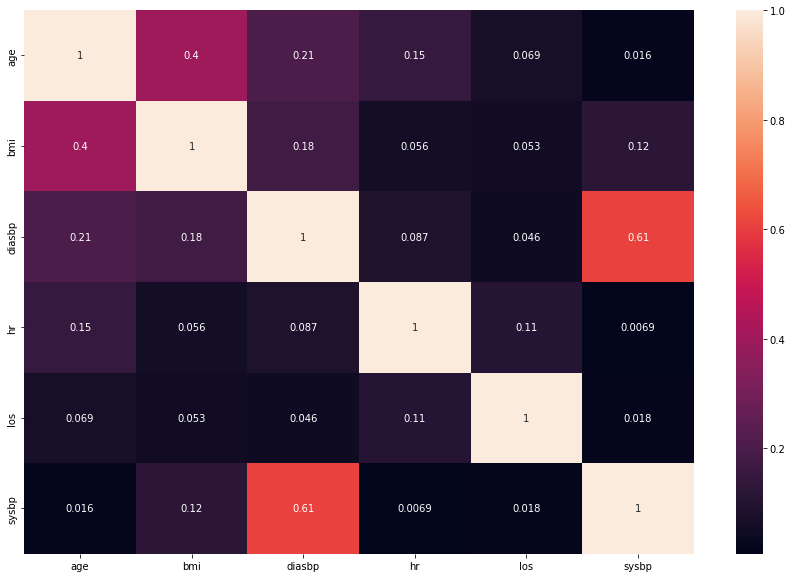

In [712]:
sns.heatmap(abs(data_x.corr()),annot = True)

Notable correlations between diastolic and systolic blood pressure, as well as age and BMI. Intuitively this is not surprising.

Text(0.5, 1.0, 'Kaplan-Meier')

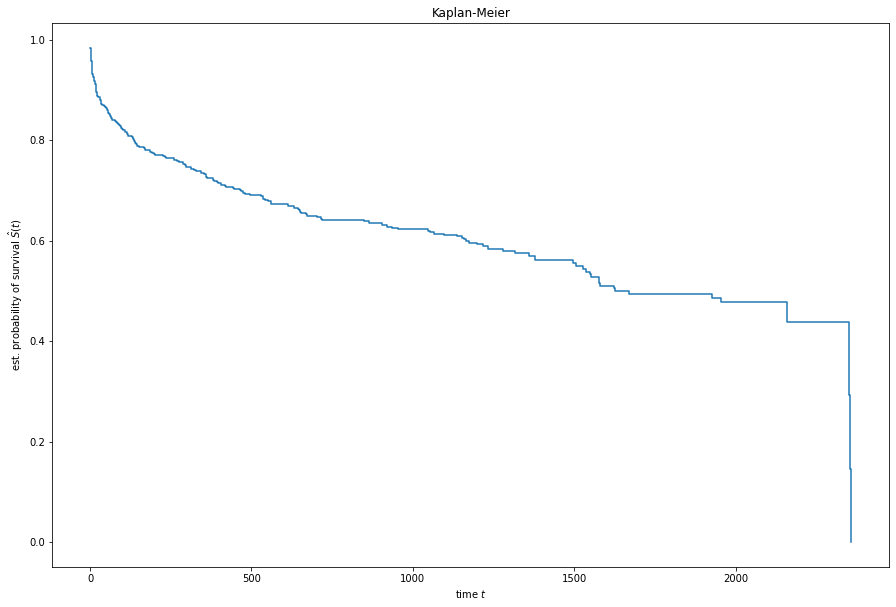

In [389]:
time, survival_prob = kaplan_meier_estimator(data_y["fstat"], data_y["lenfol"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.title("Kaplan-Meier")

In [276]:
from sksurv.compare import compare_survival


afb Values
0    0.844
1    0.156
Name: afb, dtype: float64


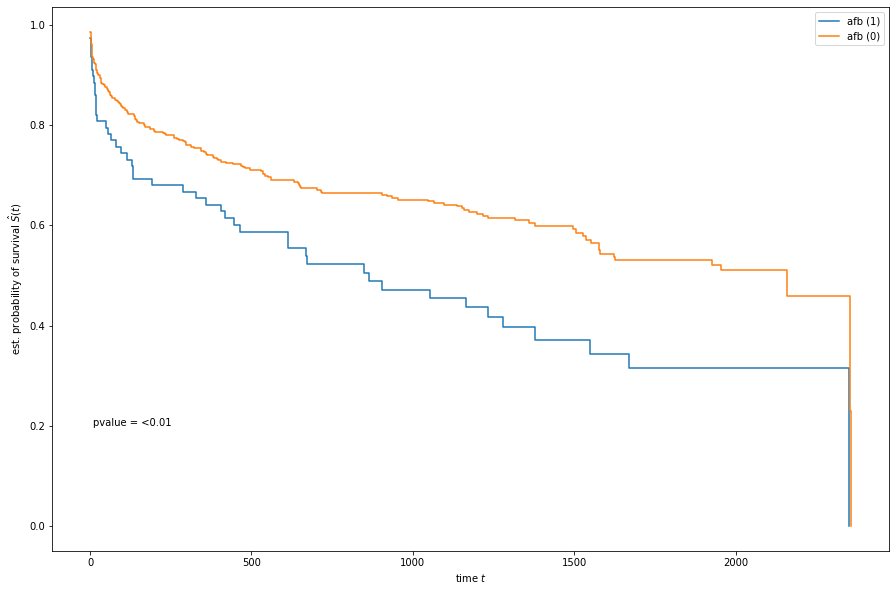

av3 Values
0    0.978
1    0.022
Name: av3, dtype: float64


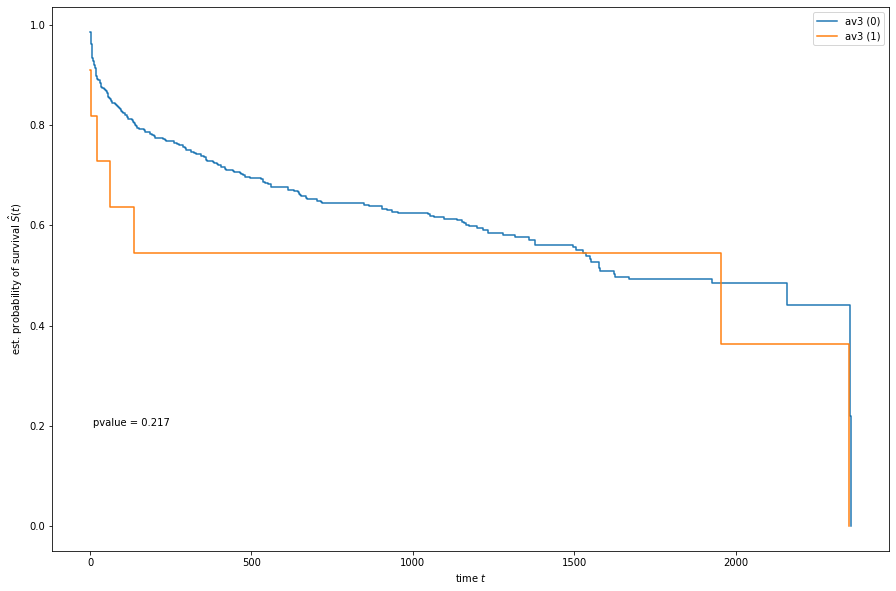

chf Values
0    0.69
1    0.31
Name: chf, dtype: float64


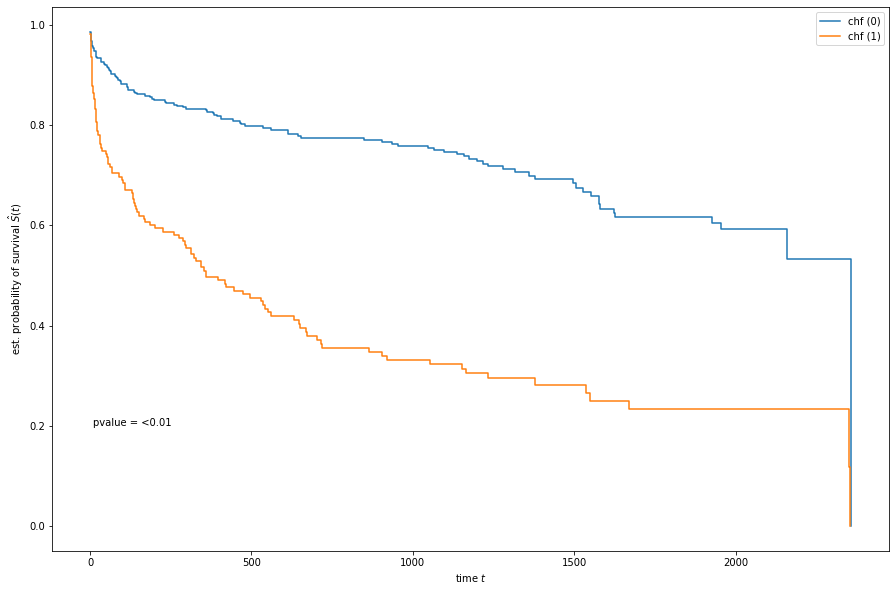

cvd Values
1    0.75
0    0.25
Name: cvd, dtype: float64


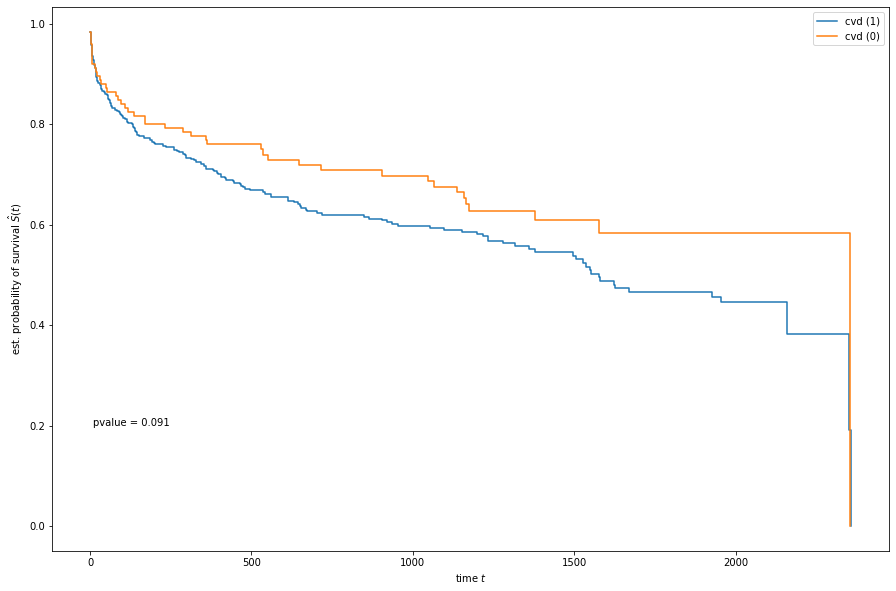

gender Values
0    0.6
1    0.4
Name: gender, dtype: float64


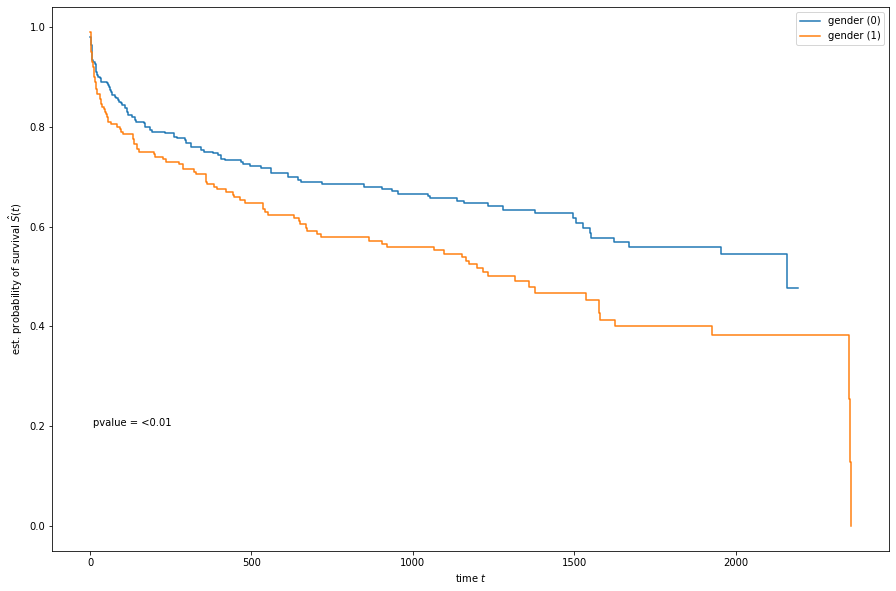

miord Values
0    0.658
1    0.342
Name: miord, dtype: float64


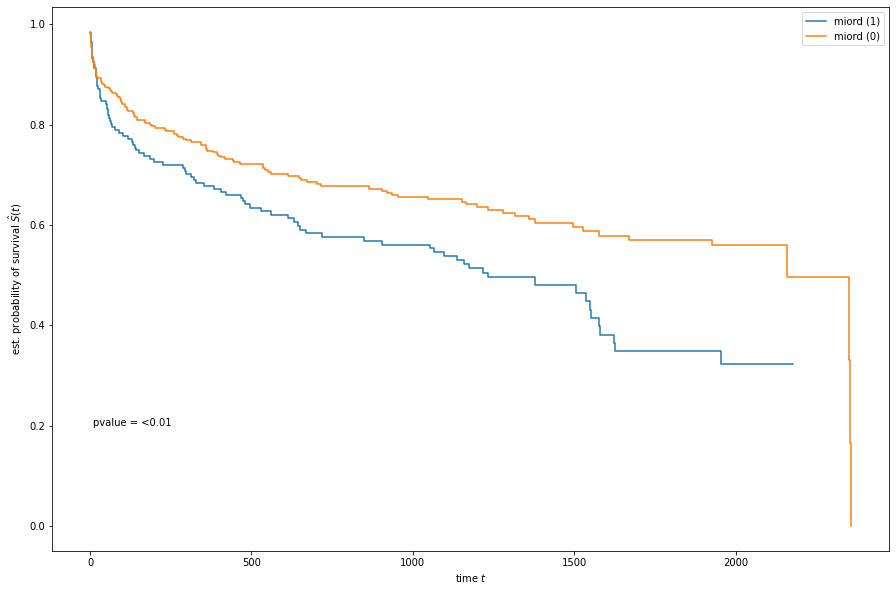

mitype Values
0    0.694
1    0.306
Name: mitype, dtype: float64


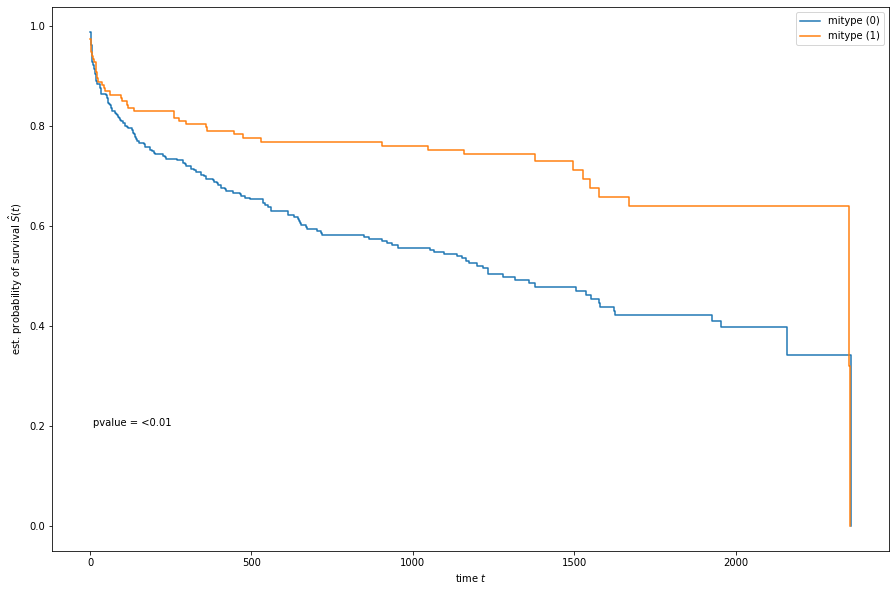

sho Values
0    0.956
1    0.044
Name: sho, dtype: float64


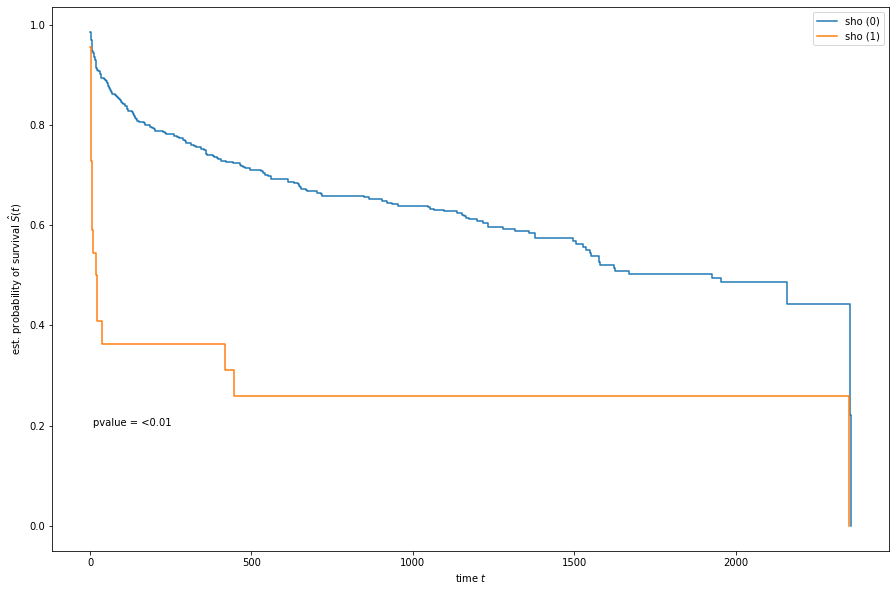

In [377]:
for cat in data_x.select_dtypes(include=["category"]).columns:
    print(cat,"Values")
    print(data_x[cat].value_counts(normalize=True))
    for val in data_x[cat].unique():
        mask = data_x[cat] == val
        time, survival_prob = kaplan_meier_estimator(data_y["fstat"][mask], data_y["lenfol"][mask])
        plt.step(time, survival_prob, where="post",label=cat+" ("+str(val)+")")
    compare_survival(data_y,data_x[cat],return_stats=True)
    pval = compare_survival(data_y,data_x[cat],return_stats=True)[1].round(3)
    if pval < 0.01:
        pval = "<0.01"
    plt.ylabel("est. probability of survival $\hat{S}(t)$")
    plt.xlabel("time $t$")
    plt.legend(loc="upper right")
    plt.text(10,0.2,"pvalue = "+str(pval))
    plt.show()

Above are the Kaplan-Meier estimates of the survival of the patients for all of the columns containing binary data. The p value for each is estimated via log-rank test and is displayed on each figure. 

SUMMARY:

1. "afb" represents whether there was a record of the patient experiencing atrial fibrillation (0 = no, 1 = yes). The survival estimate appears to be significant with $p < 0.01$, and the two survival functions visually separate within the first 100 days. There is about an 8:1 difference in sample size.

2. "av3": Did the patient have a complete heart block (0 = no, 1 = yes). So few patients experienced this, but even if we take the Kaplan-Meier estimates seriously there may be a slight difference in the first 500 days, but not after $\sim 1000$.

3. "chf": Did the patient have congestive heart complications (0 = no, 1 = yes). The curves seem to pass the eye-test as well as the log-rank p_value < 0.01. $~30\%$ of patients recorded experiencing these so chf will likely be an important feature.

4. "cvd": Does the patient have a history of cardiovascular disease (0 = no, 1 = yes). Maybe there is a slight difference in the survival rate ($75\%$ of the patients reported having a history). This feature may help but likely not to dominate the model.

5. "gender": Patients sex (0 = male, 1 = female). P-value as well as the eye-test shows discrepancy. It appears women have a slightly worse survival rate in this sample that features $60\%$ women.

6. "miord": Is this the patients first MI Order (0) or is this recurrent (1). Patients with their first MI order appear to have better survival rate throughout the entire available range.

7. " mitype": Is the MI non Q-wave (0), or Q-wave (1). The non Q-wave appears to have significant survival rate increase from the Q-wave.

8. "sho": Did the patient experience cardiogenic shock (no=0, yes=1). Very few patients recorded experiencing this $ < 5\%$, but if we take the sample size seriously it appears to have a significant effect on the survival rate.

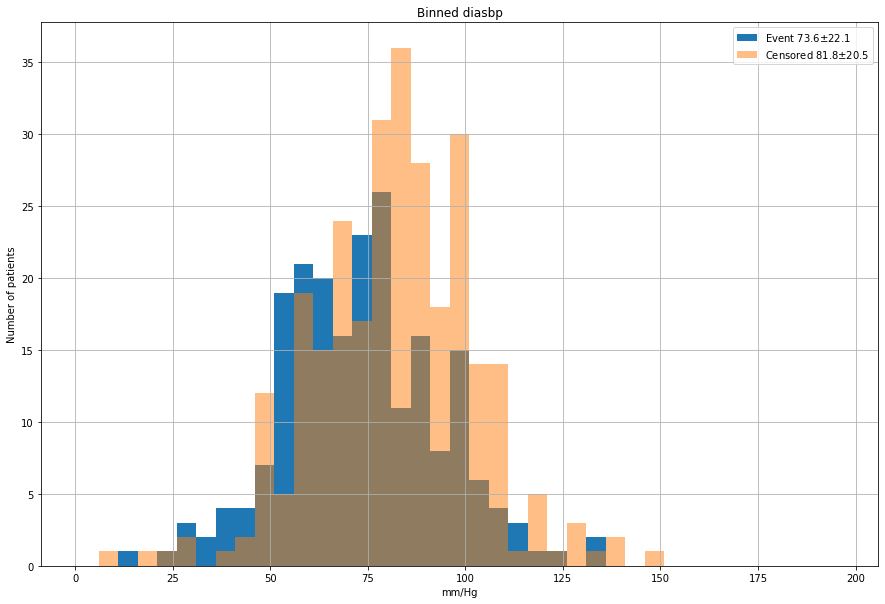

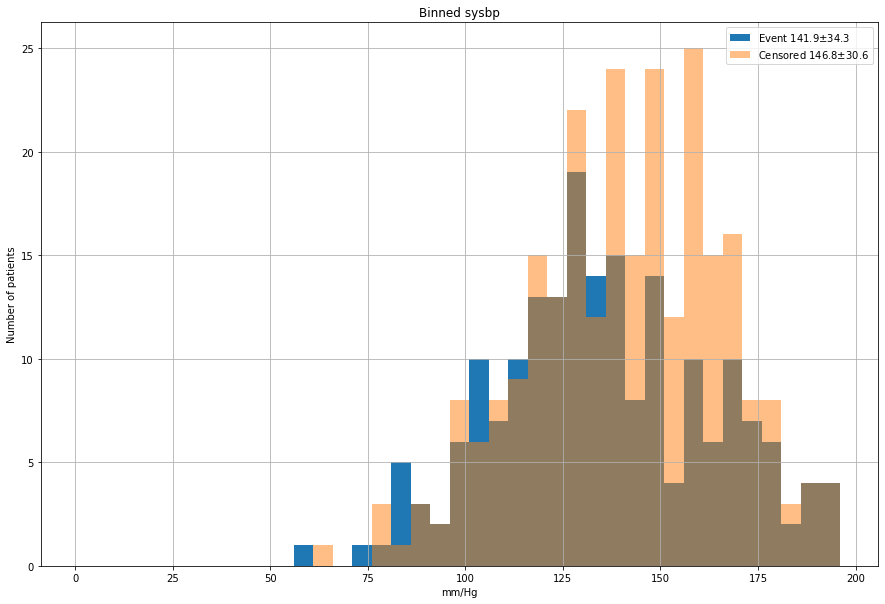

In [376]:
for cat in ["diasbp","sysbp"]:


    mask = data_y["fstat"] == True

    mean_died = data_x[cat][mask].mean().round(1)
    std_died = data_x[cat][mask].std().round(1)

    data_x[cat][mask].hist(bins=range(1,200,5),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

    mask = data_y["fstat"] == False

    mean_died = data_x[cat][mask].mean().round(1)
    std_died = data_x[cat][mask].std().round(1)


    data_x[cat][mask].hist(bins=range(1,200,5),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
    plt.title("Binned "+str(cat))
    plt.xlabel("mm/Hg")
    plt.ylabel("Number of patients")
    plt.legend(loc='upper right')
    plt.show()

Above I have binned the initial diastolic and systolic blood pressures respectively separated via whether the patient experienced an event or not. Examining the data in this manner may not be so effective due to the fact I have eliminated the time dependence, which is an incredibly important feature in this analysis. I point below where instead I have separated the four quantiles into their own groups and display each quantiles KM estimate of the survival function. 

[123.0, 141.5, 164.0]


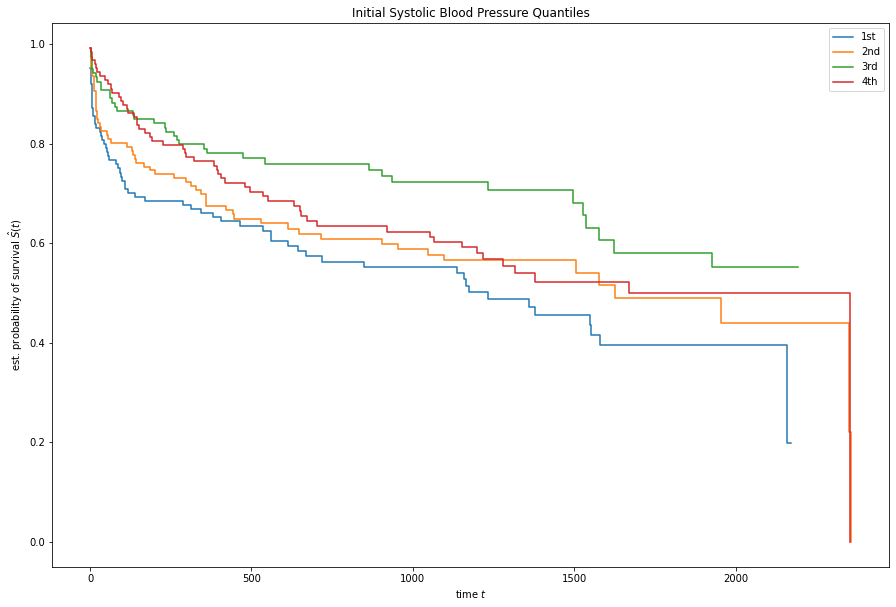

In [390]:
plot_quantiles_kaplan_meier('sysbp',data_x_new)
plt.title("Initial Systolic Blood Pressure Quantiles")
plt.show()

[63.0, 79.0, 91.25]


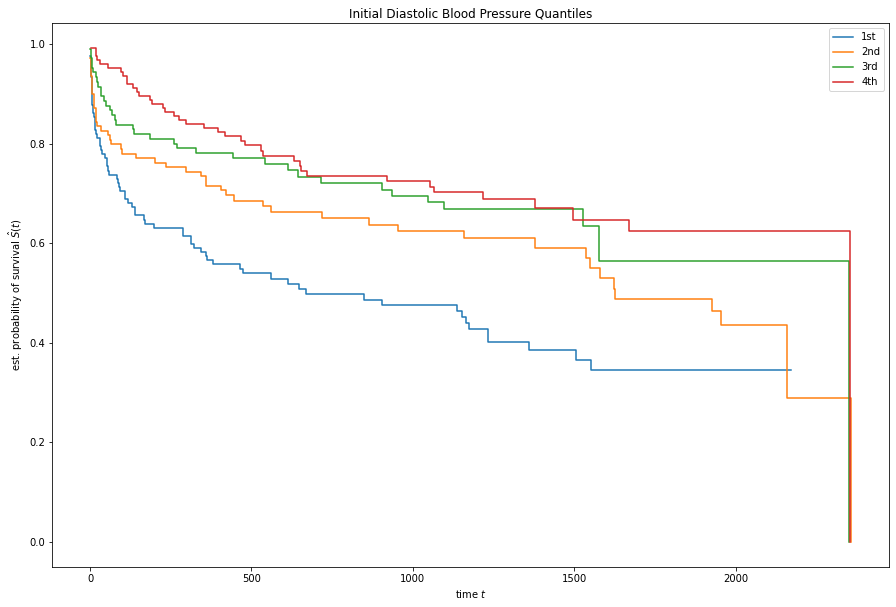

In [374]:
cat = 'diasbp'
plot_quantiles_kaplan_meier(cat,data_x_new)
plt.title("Initial Diastolic Blood Pressure Quantiles")
plt.show()

In the Systolic plot there doesn't appear to be huge significance between the different quantiles, but the lowest diastolic quantile appears to have lower survival rate.

In [563]:
data_x_new = data_x.copy()
data_x_new["sys_over_dias"] = data_x["sysbp"]/data_x["diasbp"]

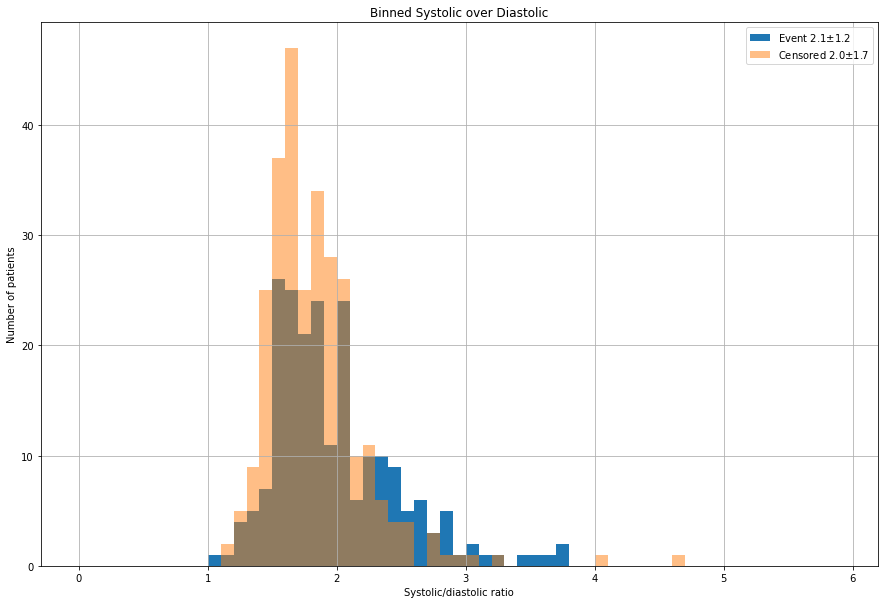

In [373]:
cat = "sys_over_dias"
mask = data_y["fstat"] == True

mean_died = data_x_new[cat][mask].mean().round(1)
std_died = data_x_new[cat][mask].std().round(1)

data_x_new[cat][mask].hist(bins=np.arange(0,6,0.1),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

mask = data_y["fstat"] == False

mean_died = data_x_new[cat][mask].mean().round(1)
std_died = data_x_new[cat][mask].std().round(1)


data_x_new[cat][mask].hist(bins=np.arange(0,6,0.1),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
plt.title("Binned Systolic over Diastolic")
plt.xlabel("Systolic/diastolic ratio")
plt.ylabel("Number of patients")
plt.legend(loc='upper right')
plt.show()

In [715]:
df[]

array([(False, 2.178e+03), (False, 2.172e+03), (False, 2.190e+03),
       ( True, 2.970e+02), (False, 2.131e+03), ( True, 1.000e+00),
       (False, 2.122e+03), ( True, 1.496e+03), ( True, 9.200e+02),
       (False, 2.175e+03), (False, 2.173e+03), ( True, 1.671e+03),
       (False, 2.192e+03), ( True, 8.650e+02), (False, 2.166e+03),
       (False, 2.168e+03), ( True, 9.050e+02), ( True, 2.353e+03),
       (False, 2.146e+03), ( True, 6.100e+01), ( True, 2.358e+03),
       (False, 2.114e+03), (False, 2.132e+03), (False, 2.139e+03),
       (False, 2.048e+03), (False, 2.152e+03), ( True, 6.000e+00),
       (False, 2.156e+03), ( True, 1.180e+02), (False, 2.064e+03),
       ( True, 8.490e+02), ( True, 7.140e+02), (False, 2.057e+03),
       ( True, 2.000e+00), ( True, 7.000e+00), (False, 2.151e+03),
       ( True, 6.000e+00), ( True, 4.220e+02), ( True, 3.540e+02),
       (False, 2.065e+03), (False, 2.048e+03), ( True, 1.065e+03),
       ( True, 5.350e+02), (False, 2.118e+03), ( True, 9.700e+

[1.6, 1.8116554054054053, 2.0635416666666666]


Text(0.5, 1.0, 'Systolic/Diastolic ')

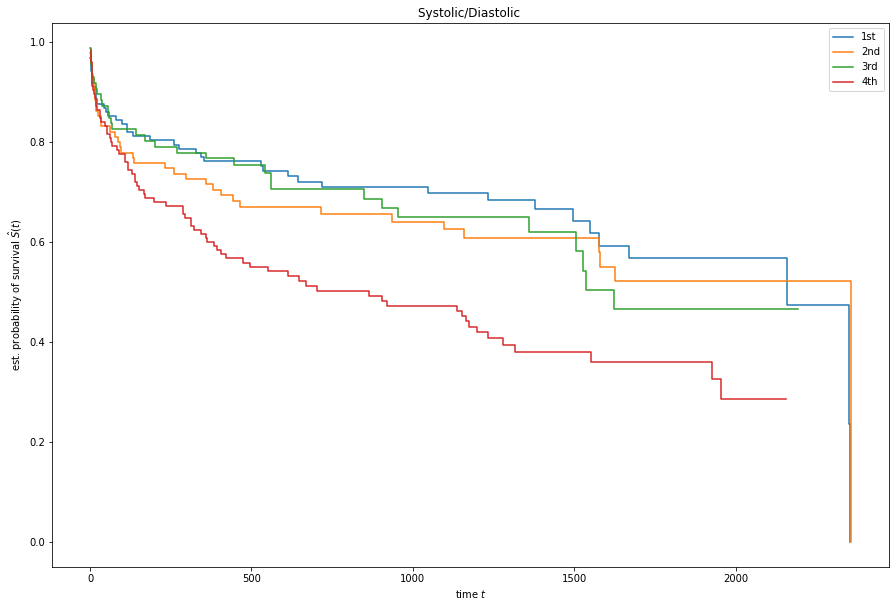

In [371]:
cat = 'sys_over_dias'
plot_quantiles_kaplan_meier(cat,data_x_new)
plt.title("Systolic/Diastolic ")

I have created a simple new feature of the ratio of systolic / diastolic and displayed the same figures. It appears if the ratio is in the upper $25\%$ there appears to be a significance from the rest of the $75\%$ of the data. This may just reflect again that low diastolic blood pressure is significant given that diastolic is in the denominator. 

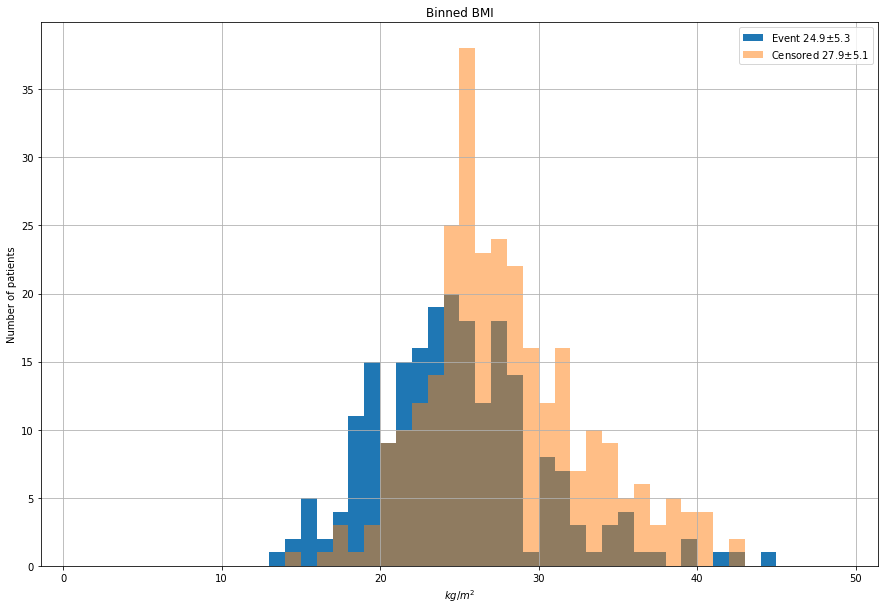

In [370]:
cat = "bmi"
mask = data_y["fstat"] == True

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)

data_x[cat][mask].hist(bins=range(1,50,1),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

mask = data_y["fstat"] == False

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)


data_x[cat][mask].hist(bins=range(1,50,1),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
plt.title("Binned BMI")
plt.xlabel("$kg/m^2$")
plt.ylabel("Number of patients")
plt.legend(loc='upper right')
plt.show()

[23.223775, 25.945925000000003, 29.3919625]


Text(0.5, 1.0, 'BMI')

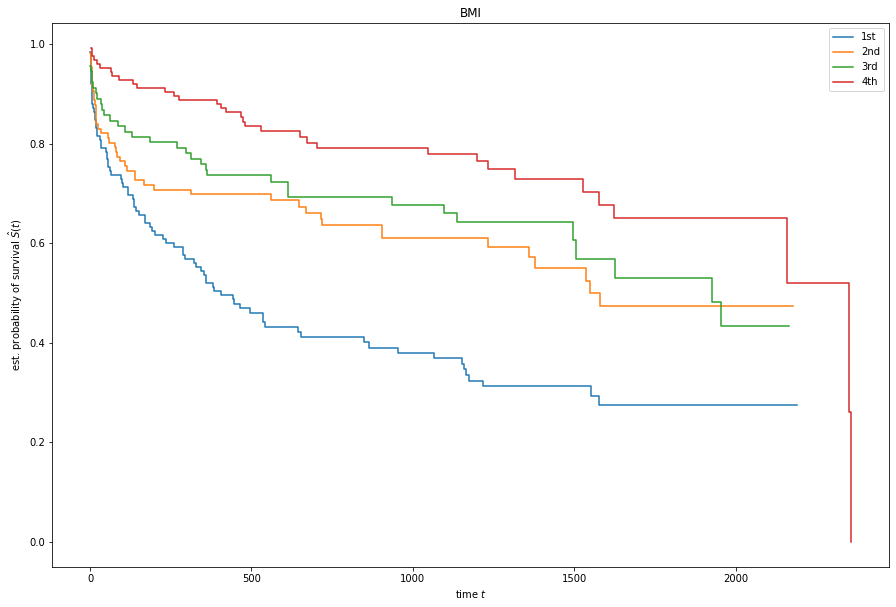

In [388]:
plot_quantiles_kaplan_meier("bmi",data_x_new)
plt.title("BMI")

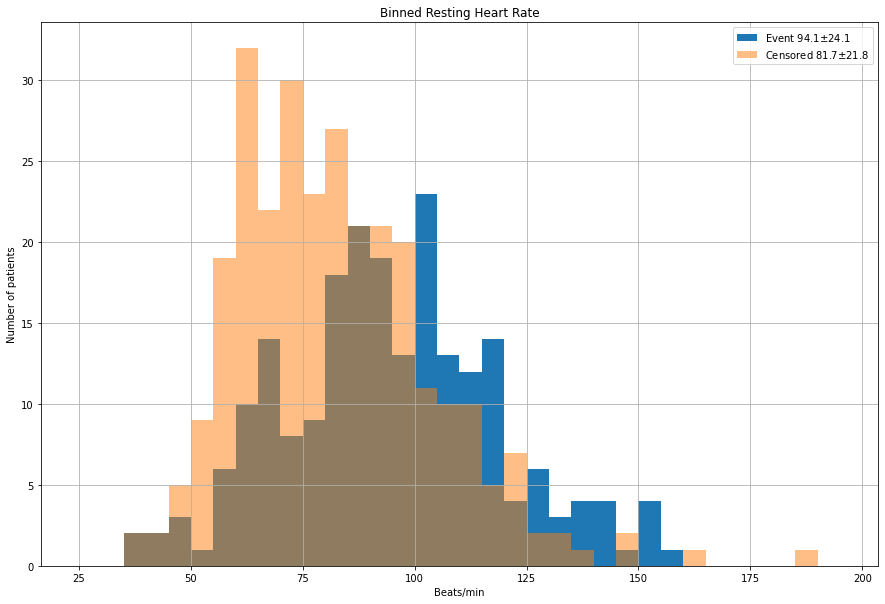

In [367]:
cat = "hr"
mask = data_y["fstat"] == True

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)

data_x[cat][mask].hist(bins=range(25,200,5),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

mask = data_y["fstat"] == False

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)


data_x[cat][mask].hist(bins=range(25,200,5),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
plt.title("Binned Resting Heart Rate")
plt.xlabel("Beats/min")
plt.ylabel("Number of patients")
plt.legend(loc='upper right')
plt.show()

[69.0, 85.0, 100.25]


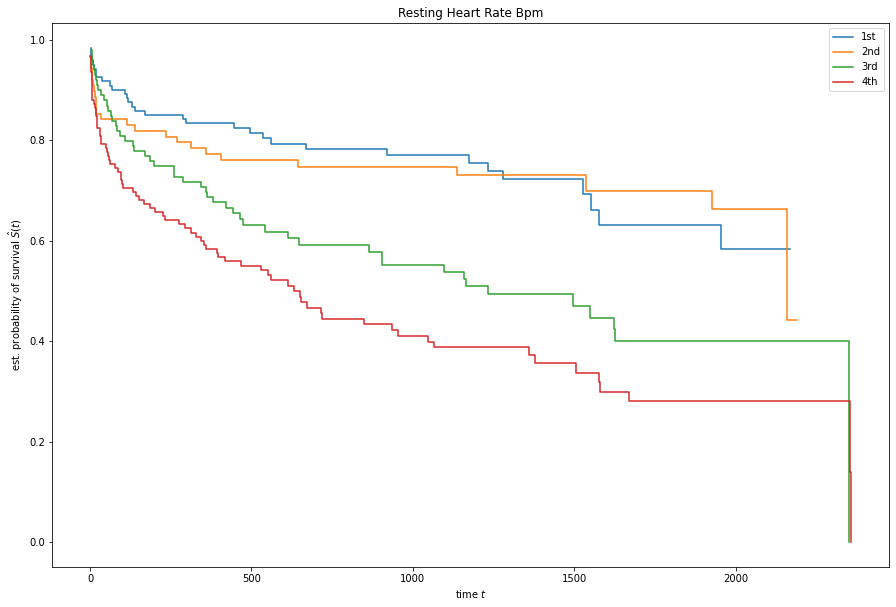

In [386]:
plot_quantiles_kaplan_meier("hr",data_x_new)
plt.title("Resting Heart Rate Bpm")
plt.show()
plt.rcParams['figure.figsize'] = [15, 10]

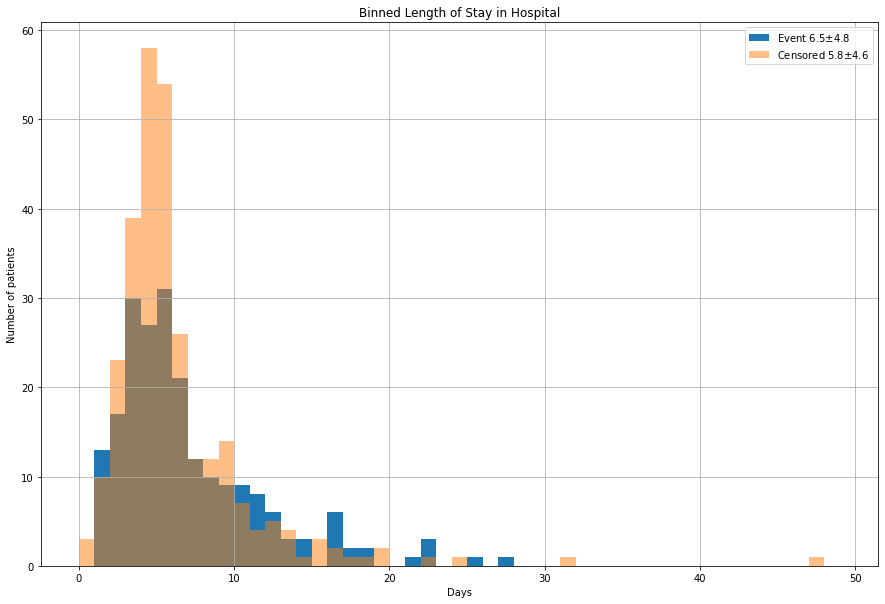

In [380]:
cat = "los"
mask = data_y["fstat"] == True

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)

data_x[cat][mask].hist(bins=range(0,50,1),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

mask = data_y["fstat"] == False

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)


data_x[cat][mask].hist(bins=range(0,50,1),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
plt.title("Binned Length of Stay in Hospital")
plt.xlabel("Days")
plt.ylabel("Number of patients")
plt.legend(loc='upper right')
plt.show()

[3.0, 5.0, 7.0]


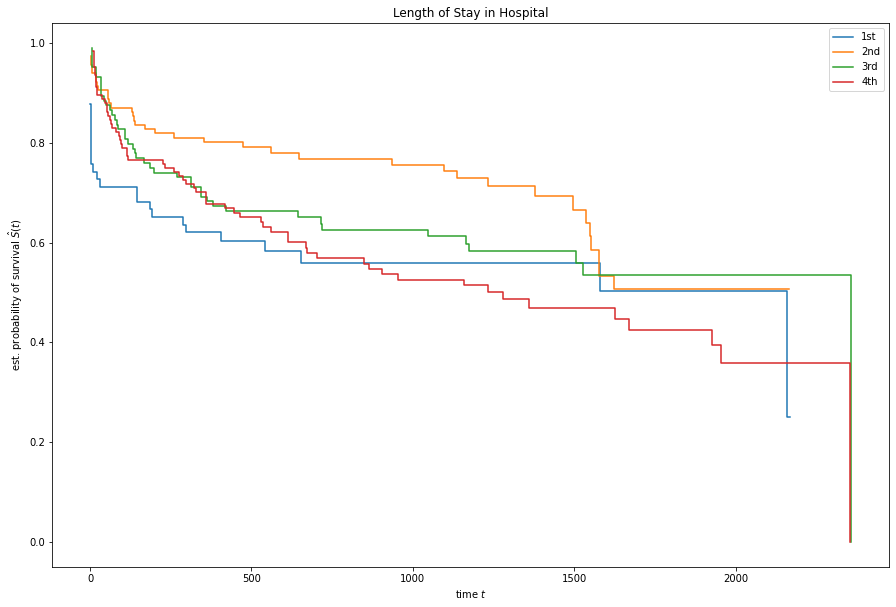

In [391]:
plot_quantiles_kaplan_meier("los",data_x_new)
plt.title("Length of Stay in Hospital")
plt.show()

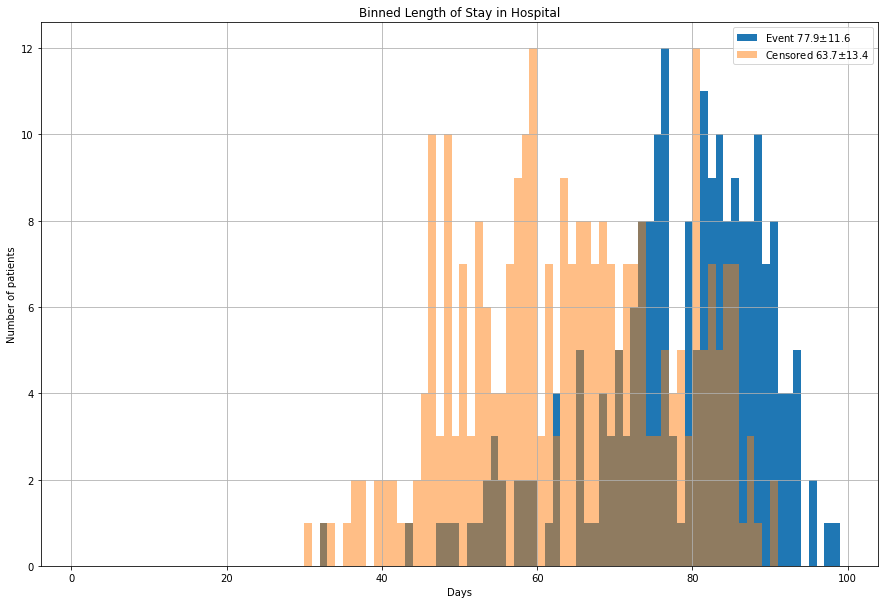

In [709]:
cat = "age"
mask = data_y["fstat"] == True

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)

data_x[cat][mask].hist(bins=range(1,100,1),label="Event "+str(mean_died)+"$\pm$"+str(std_died))

mask = data_y["fstat"] == False

mean_died = data_x[cat][mask].mean().round(1)
std_died = data_x[cat][mask].std().round(1)


data_x[cat][mask].hist(bins=range(1,100,1),alpha = 0.5,label = "Censored "+str(mean_died)+"$\pm$"+str(std_died))
plt.title("Binned Length of Stay in Hospital")
plt.xlabel("Days")
plt.ylabel("Number of patients")
plt.legend(loc='upper right')
plt.show()

[59.0, 72.0, 82.0]


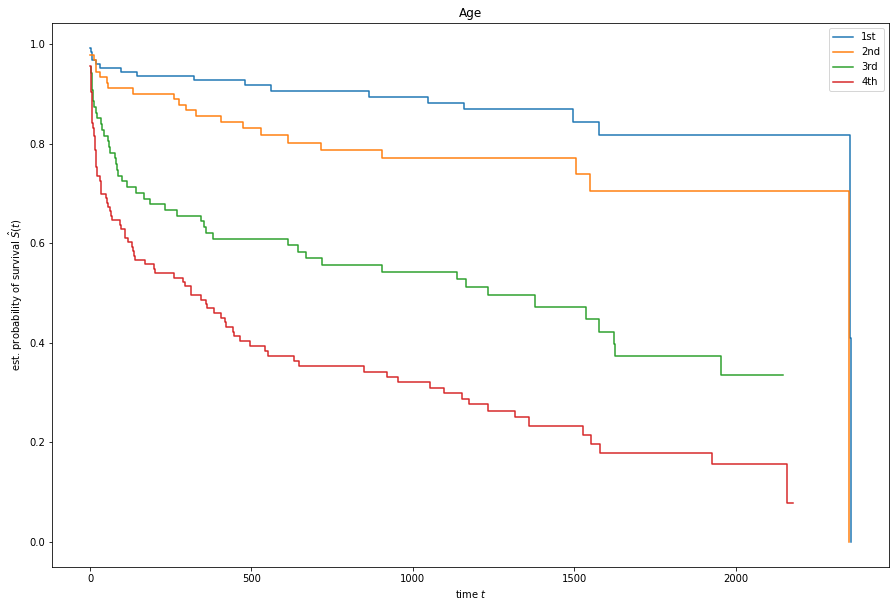

In [710]:
plot_quantiles_kaplan_meier("age",data_x_new)
plt.title("Age")
plt.show()

Summary:

1. "diasbp": Patient initial diastolic blood pressure (mm/Hg). Survival rate seems to fall faster the lower the blood pressure. 

2. "sysbp": Patient initial systolic blood pressure (mm/Hg). Not completely obvious, lower blood pressure could lead to lower survival rate, but the quartiles are not ordered as they seem to be in diastolic.

3. "sys_over_dys" (new): Ratio of systolic over diastolic. High ratio appears to lead to lower survival rate, could just be showing the same relationship from the diastolic (inverse).

4. "bmi": Patient's body mass index (BMI, $kg/m^2$). Appears to be an ordering such that the lower the BMI the lower the survival rate.

5. "hr": Patient's resting heart rate (beats/min). High resting heart rates appear to lead to significant decrease in survival rate.

6. "los": Patient's length of stay in the hospital. Maybe there is a difference in the survival function for patient's staying $<3$ days, but at around $t\sim 1500$ days all quartiles appear to converge.

7. "age": Patient's age. Certainly appears to be steeper descent in the survival function with respect to age.

# Models

In [618]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

num_list = list(data_x.select_dtypes(include=["float64"]).columns)
pipe = [('standard_scaler',StandardScaler(),num_list)]
full_pipe = ColumnTransformer(pipe,remainder='passthrough')
data_x_trans = full_pipe.fit_transform(data_x)

In [619]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x_trans,data_y,test_size=0.2,stratify=data_y["fstat"],random_state=42)

## Cox Survival

This is just Cox model.

In [30]:
from sksurv.linear_model import CoxPHSurvivalAnalysis


In [623]:
cph = CoxPHSurvivalAnalysis()

In [624]:
cph.fit(x_train,y_train)

CoxPHSurvivalAnalysis()

In [625]:
print("Train score:",cph.score(x_train,y_train))
print("Test score:",cph.score(x_test,y_test))

Train score: 0.7652957817844023
Test score: 0.8345983554712207


In [626]:
from sksurv.metrics import concordance_index_censored

prediction = cph.predict(x_test)
cph_cstat = concordance_index_censored(y_test["fstat"], y_test["lenfol"], prediction)

In [627]:
cph_cstat # score, num concordant, num discordant, tied estimated risks, tied times

(0.8345983554712207, 2639, 523, 0, 0)

In [629]:
from sksurv.metrics import concordance_index_ipcw

prediction = cph.predict(x_test)
cph_cstat_ipcw = concordance_index_ipcw(y_train, y_test, prediction)

In [630]:
cph_cstat_ipcw # score, num concordant, num discordant, tied estimated risks, tied times

(0.8371268893367779, 2639, 523, 0, 0)

In [59]:
from sksurv.metrics import cumulative_dynamic_auc

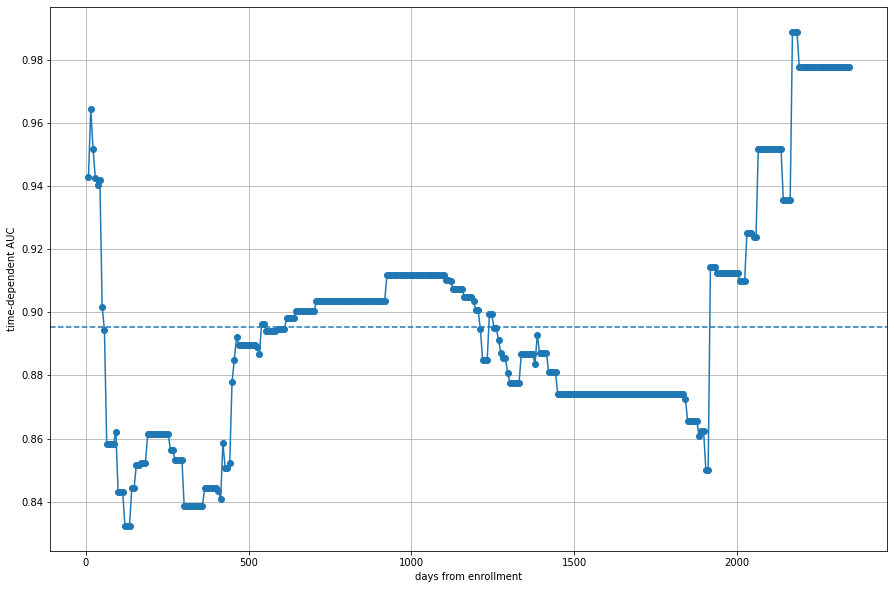

In [631]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
cph_scores = cph.predict(x_test)
cph_auc, cph_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, cph_scores, times
)

plt.plot(times, cph_auc, marker="o")
plt.axhline(cph_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)


In [632]:
cph_surv = cph.predict_survival_function(x_test[:10],return_array=False)

In [633]:
coef = pd.Series(cph.coef_, index = data_x.columns.tolist())
print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 14


sysbp     1.127093
hr        0.780894
afb       0.624777
sho      -0.521117
miord    -0.285254
gender    0.261679
diasbp    0.254395
bmi       0.247286
av3      -0.196763
age      -0.186320
los      -0.168471
mitype    0.034635
chf       0.022196
cvd       0.013597
dtype: float64

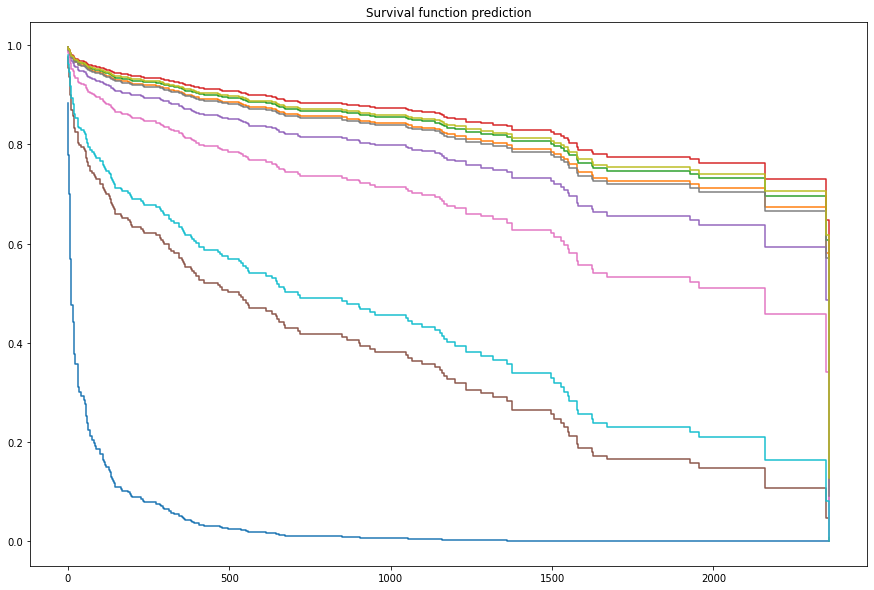

In [636]:
for i in cph_surv:
    plt.step(i.x,i(i.x),where="post")
plt.title("Survival function prediction")
plt.show()

In [634]:
cph_cum_hazard = cph.predict_cumulative_hazard_function(x_test[:10],return_array=False)

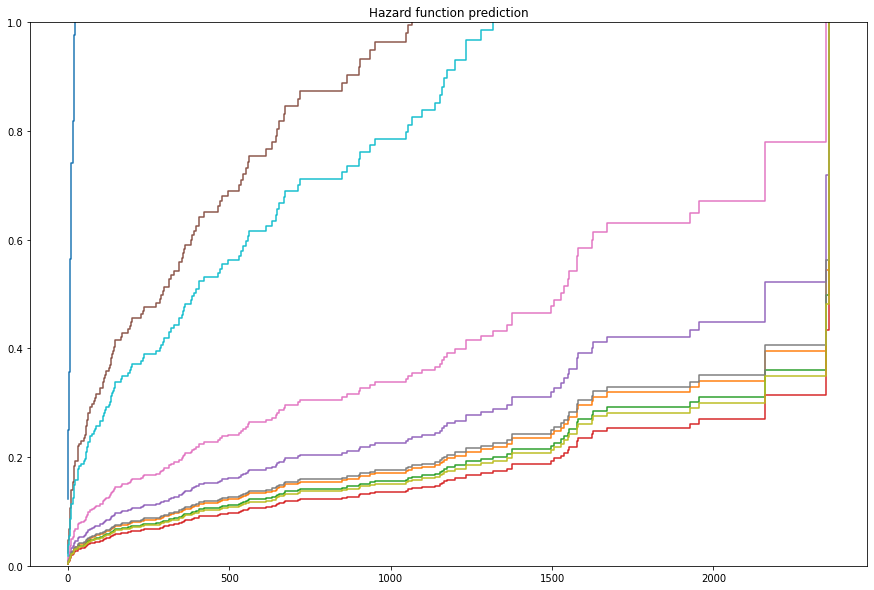

In [635]:
for i in cph_cum_hazard:
    plt.step(i.x,i(i.x),where="post")
plt.ylim(0,1)
plt.title("Hazard function prediction")
plt.show()

In [637]:
lower, upper = np.percentile(data_y["lenfol"], [10, 90])
times = np.arange(lower, upper + 1)

In [638]:
cph_surv_prob = np.row_stack([
    fn(times)
    for fn in cph.predict_survival_function(x_test)
])
random_surv_prob = 0.5 * np.ones(
    (y_test.shape[0], times.shape[0])
)
from sksurv.metrics import integrated_brier_score

cph_ibs = integrated_brier_score(data_y,y_test,cph_surv_prob,times)

## Cox model feature elimination selectkbest

Cox model with feature elimination.

In [191]:
from sklearn.feature_selection import SelectKBest, RFE
from sklearn.model_selection import KFold

In [425]:
def fit_and_score_features(X,y):
    n_features = X.shape[1]
    scores = np.empty(n_features)
    m = CoxPHSurvivalAnalysis()
    for j in range(n_features):
        tmp = X[:,j:j+1]
        m.fit(tmp,y)
        scores[j] = m.score(tmp,y)
    return scores

In [640]:
pipe = Pipeline([('select', SelectKBest(fit_and_score_features, k=5)),
                 ('model', CoxPHSurvivalAnalysis())])

In [641]:
param_grid = {'select__k': np.arange(1, data_x_trans.shape[1] + 1)}
cv = KFold(n_splits=3, random_state=1, shuffle=True)
gcv = GridSearchCV(pipe, param_grid, return_train_score=True, cv=cv)
gcv.fit(data_x, data_y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=Pipeline(steps=[('select',
                                        SelectKBest(k=5,
                                                    score_func=<function fit_and_score_features at 0x29c473ee0>)),
                                       ('model', CoxPHSurvivalAnalysis())]),
             param_grid={'select__k': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

In [642]:
results = pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.loc[:, ~results.columns.str.endswith("_time")]

,param_select__k,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,5,{'select__k': 5},0.788452,0.731429,0.797936,0.772605,0.029373,1,0.771508,0.796140,0.760745,0.776131,0.014815
7,8,{'select__k': 8},0.788068,0.734180,0.789070,0.770439,0.025643,2,0.772119,0.804703,0.759769,0.778864,0.018954
5,6,{'select__k': 6},0.785897,0.729312,0.794363,0.769857,0.028877,3,0.771508,0.796919,0.761521,0.776649,0.014901
6,7,{'select__k': 7},0.786791,0.732063,0.786952,0.768602,0.025837,4,0.771770,0.797016,0.760602,0.776463,0.015232
12,13,{'select__k': 13},0.777082,0.731852,0.789467,0.766134,0.024763,5,0.787910,0.803860,0.767234,0.786335,0.014994
3,4,{'select__k': 4},0.788196,0.723810,0.785629,0.765878,0.029766,6,0.763875,0.791113,0.757156,0.770715,0.014682
8,9,{'select__k': 9},0.780404,0.733757,0.782850,0.765670,0.022588,7,0.784880,0.804865,0.761836,0.783861,0.017581
9,10,{'select__k': 10},0.780148,0.734180,0.779013,0.764447,0.021407,8,0.784996,0.804768,0.762037,0.783934,0.017461
10,11,{'select__k': 11},0.780148,0.734497,0.777557,0.764068,0.020936,9,0.785025,0.805060,0.765569,0.785218,0.016123
11,12,{'select__k': 12},0.777210,0.733122,0.777557,0.762630,0.020866,10,0.787735,0.804736,0.765598,0.786023,0.016024


5 features scored the highest using concordance index

In [643]:
cph_5features = Pipeline([('select', SelectKBest(fit_and_score_features, k=5)),
                 ('model', CoxPHSurvivalAnalysis())])
cph_5features.fit(x_train,y_train)

Pipeline(steps=[('select',
                 SelectKBest(k=5,
                             score_func=<function fit_and_score_features at 0x29c473ee0>)),
                ('model', CoxPHSurvivalAnalysis())])

In [654]:
cols = cph_5features['select'].get_support()
print(data_x.columns[cols].tolist())
coef = pd.Series(cph_5features['model'].coef_, index = data_x.columns[cols].tolist())
print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

['afb', 'age', 'av3', 'bmi', 'hr']
Number of non-zero coefficients: 5


hr     0.758593
afb    0.619397
bmi    0.252485
av3   -0.214714
age   -0.196539
dtype: float64

In [656]:
prediction = cph_5features.predict(x_test)
cph_5features_c = cph_5features.score(x_test,y_test)
cph_5features_c_ipcw = concordance_index_ipcw(y_train, y_test, prediction)
print(cph_5features_c,cph_5features_c_ipcw[0])

0.8478810879190386 0.8525191694651475


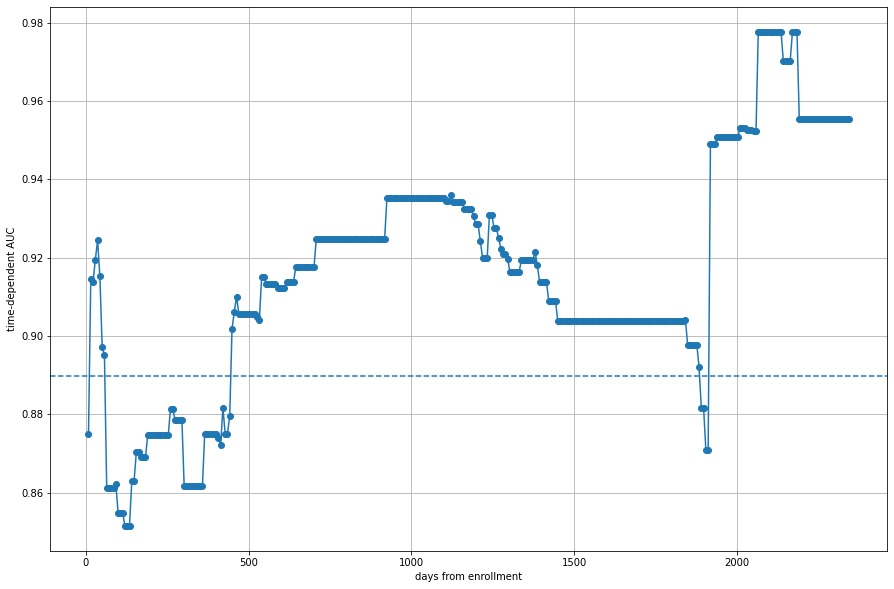

In [657]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
cph_5features_scores = cph_5features.predict(x_test)
cph_5features_auc, cph_5features_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, cph_5features_scores, times
)

plt.plot(times, cph_5features_auc, marker="o")
plt.axhline(cph_5features_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [658]:
cph_5features_surv_prob = np.row_stack([
    fn(times)
    for fn in cph_5features.predict_survival_function(x_test)
])


cph_5features_ibs = integrated_brier_score(data_y,y_test,cph_5features_surv_prob,times)

## Cox model Recursive feature elimination

In [659]:
cph_rfe = RFE(estimator = cph, n_features_to_select=5, step = 1)
cph_rfe.fit(x_train,y_train)

RFE(estimator=CoxPHSurvivalAnalysis(), n_features_to_select=5)

In [660]:
cph_rfe.ranking_

array([ 1,  6,  5,  3,  9, 10,  1,  4,  1,  7,  2,  8,  1,  1])

In [661]:
prediction = cph_rfe.predict(x_test)
result = concordance_index_ipcw(y_train, y_test, prediction)
print(result)

(0.7987511723652159, 2509, 641, 12, 0)


In [662]:
param_grid = {'n_features_to_select': np.arange(1, data_x_trans.shape[1] + 1)}
cv = KFold(n_splits=3, random_state=1, shuffle=True)
gcv = GridSearchCV(RFE(estimator = cph), param_grid, return_train_score=True, cv=cv)
gcv.fit(data_x, data_y)

GridSearchCV(cv=KFold(n_splits=3, random_state=1, shuffle=True),
             estimator=RFE(estimator=CoxPHSurvivalAnalysis()),
             param_grid={'n_features_to_select': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             return_train_score=True)

In [663]:
results = pd.DataFrame(gcv.cv_results_).sort_values(by='mean_test_score', ascending=False)
results.loc[:, ~results.columns.str.endswith("_time")]

,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
12,13,{'n_features_to_select': 13},0.761114,0.734392,0.786556,0.760687,0.021298,1,0.789920,0.805028,0.767464,0.787470,0.015433
13,14,{'n_features_to_select': 14},0.760092,0.732275,0.786026,0.759464,0.021948,2,0.790736,0.805125,0.767378,0.787746,0.015555
10,11,{'n_features_to_select': 11},0.756643,0.733757,0.773587,0.754662,0.016321,3,0.771682,0.804995,0.761090,0.779256,0.018707
11,12,{'n_features_to_select': 12},0.754471,0.733968,0.774381,0.754274,0.016499,4,0.778237,0.805157,0.764133,0.782509,0.017018
9,10,{'n_features_to_select': 10},0.756771,0.727090,0.778484,0.754115,0.021065,5,0.771653,0.801687,0.760745,0.778028,0.017311
8,9,{'n_features_to_select': 9},0.688746,0.719153,0.745799,0.717899,0.023309,6,0.728012,0.796529,0.711505,0.745349,0.036812
6,7,{'n_features_to_select': 7},0.709377,0.711217,0.716290,0.712294,0.002923,7,0.732790,0.790983,0.666959,0.730244,0.050665
7,8,{'n_features_to_select': 8},0.689640,0.718624,0.715893,0.708052,0.013067,8,0.727808,0.796740,0.666700,0.730416,0.053121
3,4,{'n_features_to_select': 4},0.674374,0.636614,0.732235,0.681074,0.039324,9,0.685754,0.709325,0.660599,0.685226,0.019896
2,3,{'n_features_to_select': 3},0.676418,0.637143,0.721053,0.678205,0.034280,10,0.689104,0.707314,0.653579,0.683332,0.022314


## Cox model ridge

In [664]:
cph_ridge = CoxPHSurvivalAnalysis()
param_grid = {"alpha":[1.0e-3,1.0e-2,0.1,1.0,10,100]}
grid_cph_ridge = GridSearchCV(cph_ridge,param_grid, cv =3 )
grid_cph_ridge.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=CoxPHSurvivalAnalysis(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 10, 100]})

In [665]:
grid_cph_ridge.best_params_

{'alpha': 10}

Create a finer grid for alpha.

In [666]:
param_grid = {"alpha":np.arange(12,14,0.1)}
grid_cph_ridge = GridSearchCV(cph_ridge,param_grid, cv =3 )
grid_cph_ridge.fit(x_train,y_train)
print(grid_cph_ridge.best_params_)

{'alpha': 13.099999999999996}


In [667]:
cph_ridge = CoxPHSurvivalAnalysis(alpha = 13.1)
cph_ridge.fit(x_train,y_train)

CoxPHSurvivalAnalysis(alpha=13.1)

In [668]:
prediction = cph_ridge.predict(x_test)
cph_ridge_c = cph_5features.score(x_test,y_test)
cph_ridge_c_ipcw = concordance_index_ipcw(y_train, y_test, prediction)
print(cph_ridge_c,cph_ridge_c_ipcw[0])

0.8478810879190386 0.8456621412762837


In [669]:
coef = pd.Series(cph_ridge.coef_, index = data_x.columns.tolist())
print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 14


hr        0.594046
afb       0.578741
sysbp     0.334779
sho      -0.298425
bmi       0.231171
diasbp    0.204636
age      -0.181557
av3      -0.173203
miord    -0.155651
gender    0.109829
los      -0.061268
mitype    0.040542
cvd      -0.037035
chf       0.030948
dtype: float64

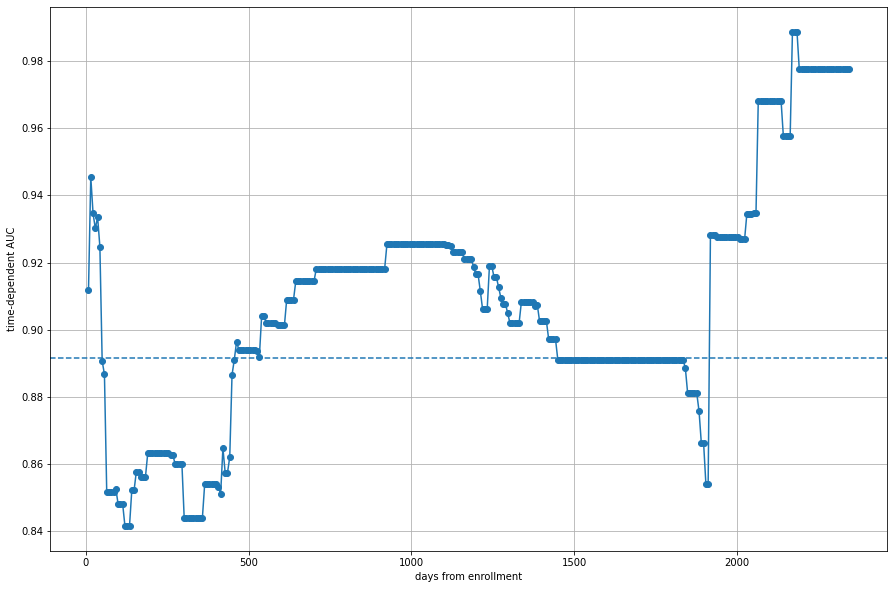

In [670]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
cph_ridge_scores = cph_ridge.predict(x_test)
cph_ridge_auc, cph_ridge_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, cph_ridge_scores, times
)

plt.plot(times, cph_ridge_auc, marker="o")
plt.axhline(cph_ridge_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [671]:
cph_ridge_surv_prob = np.row_stack([
    fn(times)
    for fn in cph_ridge.predict_survival_function(x_test)
])


cph_ridge_ibs = integrated_brier_score(data_y,y_test,cph_ridge_surv_prob,times)

## Cox model lasso

In [672]:
from sksurv.linear_model import CoxnetSurvivalAnalysis
cph_lasso = CoxnetSurvivalAnalysis(l1_ratio=1.0,fit_baseline_model = True)
cph_lasso.fit(x_train,y_train)

CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=1.0)

In [673]:
cph_lasso.alphas_

array([0.29570769, 0.26943783, 0.24550172, 0.22369202, 0.20381984,
       0.18571305, 0.16921481, 0.15418223, 0.14048511, 0.1280048 ,
       0.11663321, 0.10627183, 0.09683094, 0.08822874, 0.08039074,
       0.07324905, 0.06674181, 0.06081265, 0.05541022, 0.05048773,
       0.04600254, 0.0419158 , 0.03819212, 0.03479923, 0.03170777,
       0.02889094, 0.02632434, 0.02398576, 0.02185493, 0.0199134 ,
       0.01814435, 0.01653246, 0.01506376, 0.01372554, 0.0125062 ,
       0.01139518, 0.01038286, 0.00946048, 0.00862004, 0.00785426,
       0.00715651, 0.00652074, 0.00594146, 0.00541363, 0.0049327 ,
       0.00449449, 0.00409522, 0.00373141, 0.00339992, 0.00309788,
       0.00282267, 0.00257191, 0.00234343, 0.00213525, 0.00194556,
       0.00177272, 0.00161524, 0.00147174, 0.001341  , 0.00122187])

In [674]:
cph_lasso.score(x_test,y_test)

0.8380771663504112

In [675]:
prediction = cph_lasso.predict(x_test)
cph_lasso_c = cph_lasso.score(x_test,y_test)
cph_lasso_c_ipcw = concordance_index_ipcw(y_train, y_test, prediction)
print(cph_lasso_c,cph_lasso_c_ipcw[0])

0.8380771663504112 0.8404795999528731


In [676]:
cph_lasso.coef_[:,-1]

array([ 0.62238047, -0.18524866, -0.18560547,  0.24026217,  0.01858857,
        0.        ,  0.24547424,  0.15136002,  0.77370546, -0.13597234,
       -0.26281011,  0.02110667, -0.48909394,  1.06482059])

In [677]:
coef = pd.Series(cph_lasso.coef_[:,-1],  index=data_x.columns.tolist())
print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 13


sysbp     1.064821
hr        0.773705
afb       0.622380
sho      -0.489094
miord    -0.262810
diasbp    0.245474
bmi       0.240262
av3      -0.185605
age      -0.185249
gender    0.151360
los      -0.135972
mitype    0.021107
chf       0.018589
dtype: float64

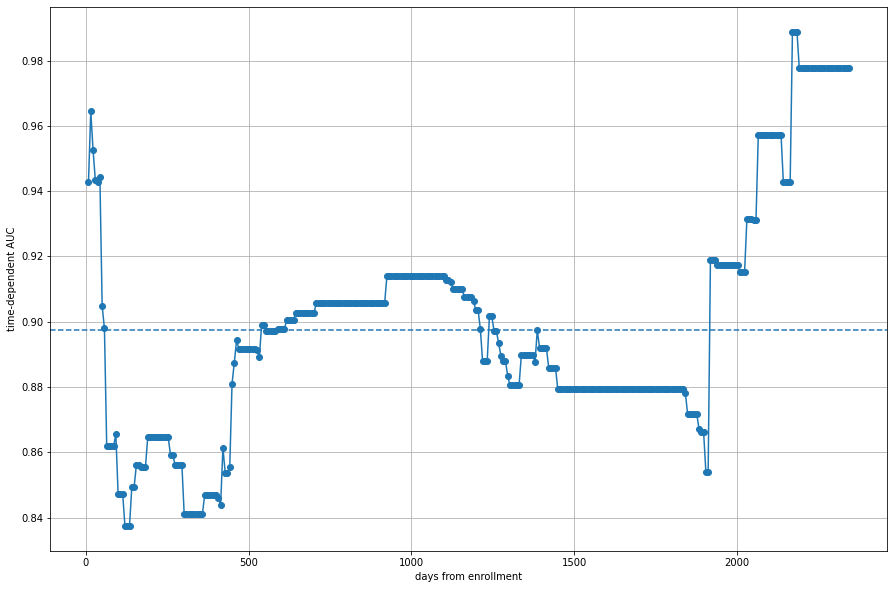

In [678]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
cph_lasso_scores = cph_lasso.predict(x_test)
cph_lasso_auc, cph_lasso_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, cph_lasso_scores, times
)

plt.plot(times, cph_lasso_auc, marker="o")
plt.axhline(cph_lasso_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [679]:
cph_lasso_surv_prob = np.row_stack([
    fn(times)
    for fn in cph_lasso.predict_survival_function(x_test)
])


cph_lasso_ibs = integrated_brier_score(data_y,y_test,cph_lasso_surv_prob,times)

## Cox model elastic net

In [680]:
param_grid = {"l1_ratio":np.arange(0,1,0.1)}
grid_cph_elastic = GridSearchCV(cph_lasso,param_grid, cv =3 )
grid_cph_elastic.fit(x_train,y_train)
print(grid_cph_elastic.best_params_)

{'l1_ratio': 0.7000000000000001}


/Users/christopherjohnson/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/christopherjohnson/Library/Python/3.8/lib/python/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/christopherjohnson/Library/Python/3.8/lib/python/site-packages/sksurv/linear_model/coxnet.py", line 247, in fit
    create_path, alphas, penalty, alpha_min_ratio = self._check_params(*X.shape)
  File "/Users/christopherjohnson/Library/Python/3

In [682]:
param_grid = {"l1_ratio":np.arange(0.65,0.75,0.01)}
grid_cph_elastic = GridSearchCV(cph_lasso,param_grid, cv =3 )
grid_cph_elastic.fit(x_train,y_train)
print(grid_cph_elastic.best_params_)
cph_elastic = CoxnetSurvivalAnalysis(l1_ratio=0.72,fit_baseline_model = True)
cph_elastic.fit(x_train,y_train)

{'l1_ratio': 0.7200000000000001}


CoxnetSurvivalAnalysis(fit_baseline_model=True, l1_ratio=0.72)

In [683]:
prediction = cph_elastic.predict(x_test)
cph_elastic_c = grid_cph_elastic.score(x_test,y_test)
cph_elastic_c_ipcw = concordance_index_ipcw(y_train, y_test, prediction)
print(cph_elastic_c,grid_cph_elastic_c_ipcw[0])

0.8377609108159393 0.785154142844147


In [684]:
coef = pd.Series(cph_elastic.coef_[:,-1],  index=data_x.columns.tolist())
print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 13


sysbp     1.050036
hr        0.771897
afb       0.622311
sho      -0.489649
miord    -0.263808
diasbp    0.246547
bmi       0.240615
av3      -0.186089
age      -0.185254
gender    0.171570
los      -0.138617
mitype    0.023076
chf       0.019518
dtype: float64

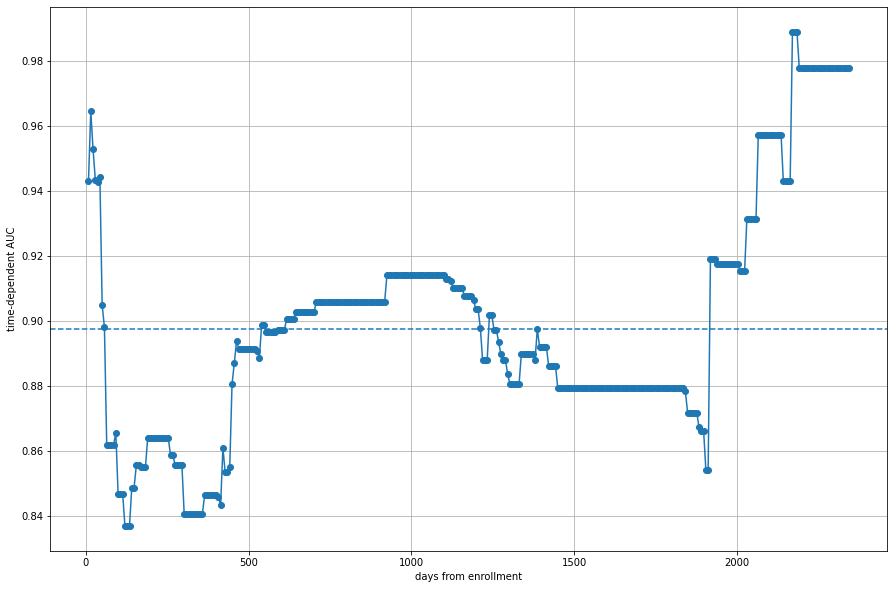

In [685]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
cph_elastic_scores = cph_elastic.predict(x_test)
cph_elastic_auc, cph_elastic_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, cph_elastic_scores, times
)

plt.plot(times, cph_elastic_auc, marker="o")
plt.axhline(cph_elastic_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [686]:
cph_elastic_surv_prob = np.row_stack([
    fn(times)
    for fn in cph_elastic.predict_survival_function(x_test)
])


cph_elastic_ibs = integrated_brier_score(data_y,y_test,cph_elastic_surv_prob,times)

## Random Forest

In [575]:
from sksurv.ensemble import RandomSurvivalForest

rsf =  RandomSurvivalForest()

In [576]:
from sklearn.model_selection import GridSearchCV

In [577]:
param_grid = {"n_estimators":[25,50,100,125,150],"max_depth":range(3,7)}

In [578]:
grid_rsf = GridSearchCV(rsf,param_grid,cv=3)

In [687]:
grid_rsf.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomSurvivalForest(),
             param_grid={'max_depth': range(3, 7),
                         'n_estimators': [25, 50, 100, 125, 150]})

In [688]:
grid_rsf.best_params_

{'max_depth': 3, 'n_estimators': 100}

In [689]:
prediction = grid_rsf.predict(x_test)
rsf_c = concordance_index_censored(y_test["fstat"], y_test["lenfol"], prediction)
rsf_c_ipcw = concordance_index_ipcw(y_train, y_test, prediction)

In [690]:
print("C score:",rsf_c)
print("C score icpw",rsf_c_ipcw)

C score: (0.801707779886148, 2535, 627, 0, 0)
C score icpw (0.8071361606871905, 2535, 627, 0, 0)


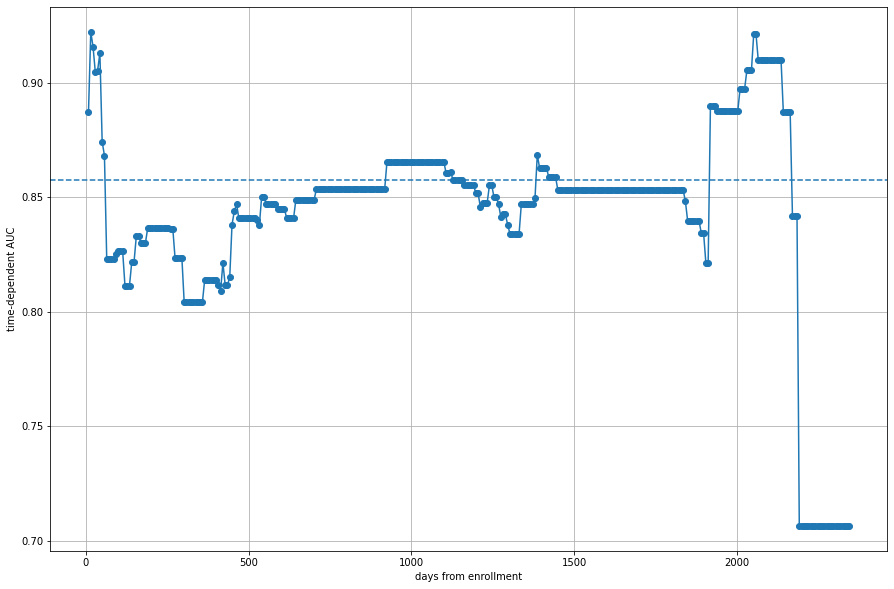

In [691]:
times = np.arange(8, data_y["lenfol"].max()-7, 7)
rsf_risk_scores = grid_rsf.predict(x_test)
rsf_auc, rsf_mean_auc = cumulative_dynamic_auc(
    y_train, y_test, rsf_risk_scores, times
)

plt.plot(times, rsf_auc, marker="o")
plt.axhline(rsf_mean_auc, linestyle="--")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)

In [692]:
rsf =  RandomSurvivalForest(n_estimators=150,max_depth=3)
rsf.fit(x_train,y_train)
rsf_surv_prob = np.row_stack([
    fn(times)
    for fn in rsf.predict_survival_function(x_test)
])

In [693]:
rsf_ibs = integrated_brier_score(data_y,y_test,rsf_surv_prob,times)

In [694]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    rsf, x_test, y_test, n_repeats=15, random_state=1
)
pd.DataFrame(
    {k: result[k] for k in ("importances_mean", "importances_std",)},
    index=data_x.columns
).sort_values(by="importances_mean", ascending=False)

,importances_mean,importances_std
afb,0.114400,0.033626
hr,0.033544,0.017352
age,0.029349,0.013510
sysbp,0.006578,0.003742
bmi,0.005777,0.008352
av3,0.003753,0.004818
chf,0.002530,0.003248
mitype,0.001476,0.001535
miord,0.000970,0.000898
sho,0.000907,0.004747


## Boosted

In [151]:
from sksurv.ensemble import GradientBoostingSurvivalAnalysis, ComponentwiseGradientBoostingSurvivalAnalysis


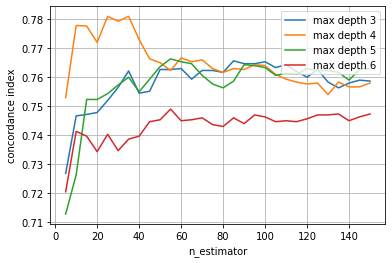

In [149]:
for depth in [3,4,5,6]:
    scores_cph_tree = {}

    est_cph_tree = GradientBoostingSurvivalAnalysis(
    learning_rate=1.0, max_depth=depth, random_state=0
     )
    for i in range(1, 31):
        n_estimators = i * 5
        est_cph_tree.set_params(n_estimators=n_estimators)
        est_cph_tree.fit(x_train, y_train)
        scores_cph_tree[n_estimators] = est_cph_tree.score(x_test, y_test)
    x, y = zip(*scores_cph_tree.items())
    plt.plot(x, y,label="max depth "+str(depth))
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

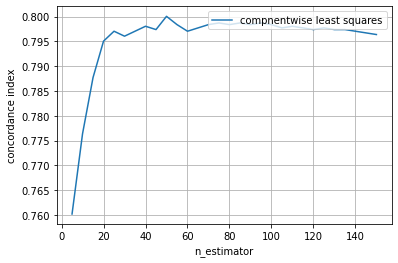

In [171]:
scores_cph_ls = {}

est_cph_ls = ComponentwiseGradientBoostingSurvivalAnalysis(
    learning_rate=1.0, random_state=0
     )
for i in range(1, 31):
    n_estimators = i * 5
    est_cph_ls.set_params(n_estimators=n_estimators)
    est_cph_ls.fit(x_train, y_train)
    scores_cph_ls[n_estimators] = est_cph_ls.score(x_test, y_test)
x, y = zip(*scores_cph_ls.items())
plt.plot(x, y,label="compnentwise least squares")
plt.xlabel("n_estimator")
plt.ylabel("concordance index")
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [173]:
coef = pd.Series(est_cph_ls.coef_, ["Intercept"] + data_x.columns.tolist())

print("Number of non-zero coefficients:", (coef != 0).sum())
coef_nz = coef[coef != 0]
coef_order = coef_nz.abs().sort_values(ascending=False).index
coef_nz.loc[coef_order]

Number of non-zero coefficients: 13


sysbp     1.017973
hr        0.891038
afb       0.652306
miord    -0.349716
gender    0.318943
age      -0.268604
bmi       0.253554
av3      -0.243681
sho      -0.109597
chf      -0.048441
los      -0.032223
mitype    0.031503
cvd       0.014179
dtype: float64

In [174]:
est_aft_ls = ComponentwiseGradientBoostingSurvivalAnalysis(
    loss="ipcwls", n_estimators=300, learning_rate=1.0, random_state=0
).fit(x_train, y_train)
cindex = est_aft_ls.score(x_test, y_test)

In [175]:
cindex

0.7676902536715621

# Summary

In [695]:
scores = {"Model":["Cox","Cox 5 features","Cox ridge", "Cox lasso", "Cox elastic","Random forest"],
          "C":[cph_cstat[0],cph_5features_c,cph_ridge_c,cph_lasso_c,cph_elastic_c,rsf_c[0]],
          "C_ipcw":[cph_cstat_ipcw[0],cph_5features_c_ipcw[0],cph_ridge_c_ipcw[0],cph_lasso_c_ipcw[0],cph_elastic_c_ipcw[0],rsf_c_ipcw[0]],
         "Mean t-dep AUC":[cph_mean_auc,cph_5features_mean_auc,cph_ridge_mean_auc,cph_lasso_mean_auc,cph_elastic_mean_auc,rsf_mean_auc],
         "IBS":[cph_ibs,cph_5features_ibs,cph_ridge_ibs,cph_lasso_ibs,cph_elastic_ibs,rsf_ibs]}
summary_scores = pd.DataFrame(scores)

In [696]:
summary_scores

,Model,C,C_ipcw,Mean t-dep AUC,IBS
0,Cox,0.834598,0.837127,0.895360,0.138765
1,Cox 5 features,0.847881,0.852519,0.889827,0.134656
2,Cox ridge,0.847881,0.845662,0.891567,0.136177
3,Cox lasso,0.838077,0.840480,0.897599,0.132443
4,Cox elastic,0.837761,0.840189,0.897383,0.132557
5,Random forest,0.801708,0.807136,0.857303,0.172988


In [697]:
summary_scores[["Model","C"]].sort_values(ascending=False,by="C")

,Model,C
1,Cox 5 features,0.847881
2,Cox ridge,0.847881
3,Cox lasso,0.838077
4,Cox elastic,0.837761
0,Cox,0.834598
5,Random forest,0.801708


In [698]:
summary_scores[["Model","C_ipcw"]].sort_values(ascending=False,by="C_ipcw")

,Model,C_ipcw
1,Cox 5 features,0.852519
2,Cox ridge,0.845662
3,Cox lasso,0.840480
4,Cox elastic,0.840189
0,Cox,0.837127
5,Random forest,0.807136


In [699]:
summary_scores[["Model","Mean t-dep AUC"]].sort_values(ascending=False,by="Mean t-dep AUC")

,Model,Mean t-dep AUC
3,Cox lasso,0.897599
4,Cox elastic,0.897383
0,Cox,0.895360
2,Cox ridge,0.891567
1,Cox 5 features,0.889827
5,Random forest,0.857303


In [701]:
summary_scores[["Model","IBS"]].sort_values(ascending=True,by="IBS")

,Model,IBS
3,Cox lasso,0.132443
4,Cox elastic,0.132557
1,Cox 5 features,0.134656
2,Cox ridge,0.136177
0,Cox,0.138765
5,Random forest,0.172988


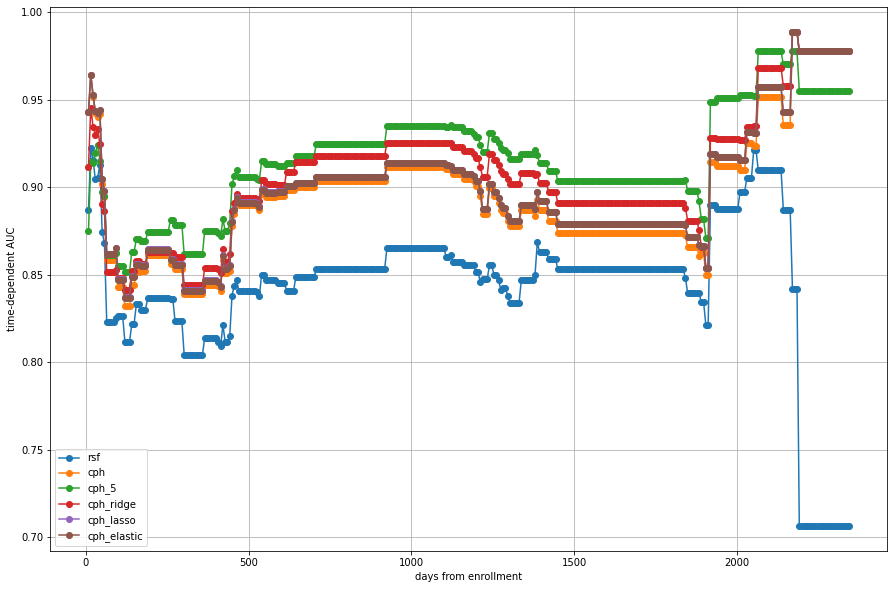

In [708]:
plt.plot(times, rsf_auc, marker="o",label="rsf")
plt.plot(times, cph_auc, marker="o",label="cph")
plt.plot(times, cph_5features_auc, marker="o",label="cph_5")
plt.plot(times, cph_ridge_auc, marker="o",label="cph_ridge")
plt.plot(times, cph_lasso_auc, marker="o",label="cph_lasso")
plt.plot(times, cph_elastic_auc, marker="o",label="cph_elastic")



plt.legend(loc="lower left")
plt.xlabel("days from enrollment")
plt.ylabel("time-dependent AUC")
plt.grid(True)